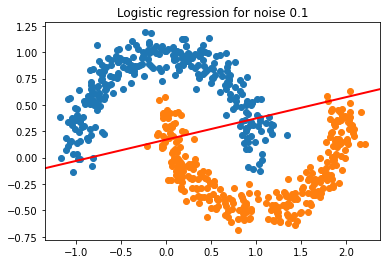

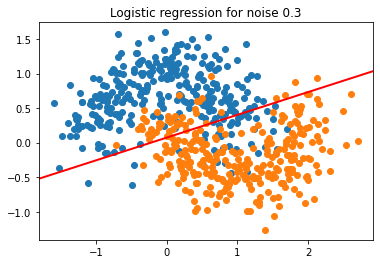

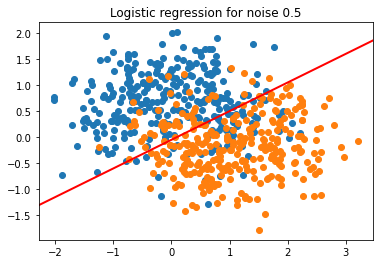

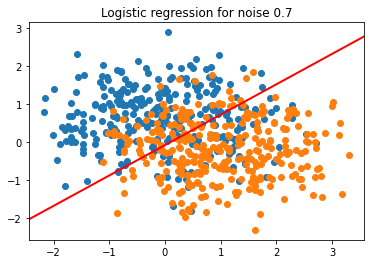

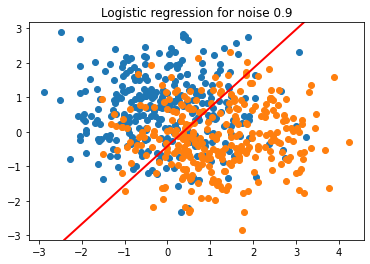

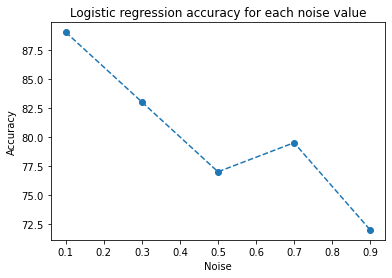

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def sigma(x):
    return 1/(1+np.exp(-x))

# Logistic regression
def log_reg(noise):
    #Reading data
    data = []
    with open(f"two_moon_{noise}/train.txt") as f:
        data = f.readlines()

    val_data = []
    with open(f"two_moon_{noise}/val.txt") as f:
        val_data = f.readlines()  

    X_val = np.array(list(map((lambda str: [str.split()[0],str.split()[1]]), val_data)),dtype=float)
    y_val = np.array(list(map((lambda str: str.split()[2]), val_data)),dtype=int)
    X_rows = np.array(list(map((lambda str: [str.split()[0],str.split()[1]]), data)),dtype=float)
    X = np.array([list(map((lambda str: str.split()[0]), data)),
                 list(map((lambda str: str.split()[1]), data))],dtype=float)
    y = np.array(list(map((lambda str: str.split()[2]), data)),dtype=int)
        
    #Training data
    m = len(X)
    b = 0
    w = np.array([1,1])
    alpha = 0.01

    for epoch in range(1000):
        z = np.dot(w.T,X) + b
        y_hat = sigma(z)
        dz = y_hat - y
        dw = (1/m)*np.dot(X,dz.T)
        db = (1/m)*np.sum(dz)
        w = w-alpha*dw
        b = b-alpha*db
    
    #Plotting regression
    zeros = X_rows[np.where(y == 0), :][0]
    ones = X_rows[np.where(y == 1), :][0]
    plt.scatter(zeros[:, 0], zeros[:, 1])
    plt.scatter(ones[:, 0], ones[:, 1])
    plt.axline((0, -b/w[1]), (1, (-b-w[0])/w[1]), linewidth=2, color='r')
    plt.title(f"Logistic regression for noise {noise}")
    plt.show()
    
    #Getting accuracy
    predictions = sigma(np.dot(X_val,w) + b)
    preds_class = []
    preds_class = [1 if i > 0.5 else 0 for i in predictions]
    preds_class = np.array(preds_class)

    accuracy = np.sum(y_val == preds_class) / m
    return accuracy
   
noises = [0.1,0.3,0.5,0.7,0.9]
accuracies = list(map((lambda x: log_reg(x)), noises))
plt.title("Logistic regression accuracy for each noise value")
plt.xlabel("Noise")
plt.ylabel("Accuracy")
plt.plot(noises,accuracies,"o--")
# The accuracy decreases when the noise increases
# Slight increase in the accuracy for the noise 0.7, may be due to variancy

[[86.5 89.5 90.5 91.  99.5]
 [82.5 81.5 87.  90.5 92. ]
 [73.  75.  75.  80.5 78. ]
 [45.5 77.  75.5 77.  77.5]
 [74.  72.5 72.  71.5 73.5]]


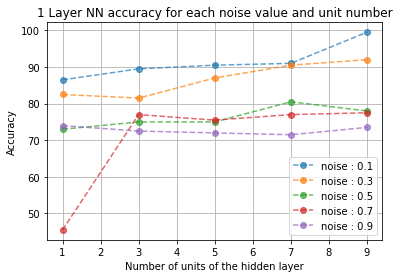

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def sigma(x):
    return 1/(1+np.exp(-x))

def sigma_prime(x):
    return sigma(x)*(1-sigma(x))

def relu(x):
    return np.maximum(0,x)

def relu_prime(x):
    x[x >= 0] = 1
    x[x < 0] = 0    
    return x

# One hidden layer NN
def nn(noise,hidden_units_nb):
    #Reading data
    data = []
    with open(f"two_moon_{noise}/train.txt") as f:
        data = f.readlines()

    val_data = []
    with open(f"two_moon_{noise}/val.txt") as f:
        val_data = f.readlines()  

    X_val = np.array(list(map((lambda str: [str.split()[0],str.split()[1]]), val_data)),dtype=float)
    y_val = np.array(list(map((lambda str: str.split()[2]), val_data)),dtype=int)
    #X_rows = np.array(list(map((lambda str: [str.split()[0],str.split()[1]]), data)),dtype=float)
    X = np.array([list(map((lambda str: str.split()[0]), data)),
                 list(map((lambda str: str.split()[1]), data))],dtype=float)
    y = np.array(list(map((lambda str: str.split()[2]), data)),dtype=int)
        
    #Training data
    m = len(X)
    b1 = np.zeros((hidden_units_nb,1))
    b2 = 0
    w1 = np.random.randn(2,hidden_units_nb)*0.01
    w2 = np.random.randn(hidden_units_nb,1)*0.01
    alpha = 0.01

    for epoch in range(1000):
        z1 = np.dot(w1.T,X) + b1
        y_hat1 = relu(z1)
        z2 = np.dot(w2.T,y_hat1) + b2
        y_hat2 = sigma(z2)
        
        dz2 = y_hat2 - y
        dw2 = (1/m)*np.dot(dz2,y_hat1.T)
        db2 = (1/m)*np.sum(dz2,axis=1,keepdims=True)
        dz1 = np.dot(w2,dz2)*relu_prime(z1)
        dw1 = (1/m)*np.dot(dz1,X.T)
        db1 = (1/m)*np.sum(dz1,axis=1,keepdims=True)
        w1 = w1-alpha*dw1.T
        w2 = w2-alpha*dw2.T
        b1 = b1-alpha*db1
        b2 = b2-alpha*db2
    
    #Getting accuracy
    preds1 = relu(np.dot(X_val,w1).T + b1)
    preds = sigma(np.dot(preds1.T,w2) + b2)
    preds_class = []
    preds_class = [1 if i > 0.5 else 0 for i in preds]
    preds_class = np.array(preds_class)

    accuracy = np.sum(y_val == preds_class) / m
    return accuracy
   
noises = [0.1,0.3,0.5,0.7,0.9]
hidden_units_nb = [1,3,5,7,9]

accuracies = np.zeros((5,5))
noise_index = 0
plt.title("1 Layer NN accuracy for each noise value and unit number")
plt.xlabel("Number of units of the hidden layer")
plt.ylabel("Accuracy")
for noise in noises:
    unit_index = 0
    label = f"noise : {noise}"
    for unit_nb in hidden_units_nb:
        accuracies[noise_index][unit_index] = nn(noise,unit_nb)
        unit_index += 1
    plt.plot(hidden_units_nb,accuracies[noise_index],"o--", label=label,alpha=0.7)
    noise_index += 1
plt.grid()
plt.legend()
print(accuracies)
# The accuracy decreases when the sound increases
# When we add more units, it seems to increase the accuracy. For the noise 0.5, 7 units are more efficient than 9 but it is the only exception.

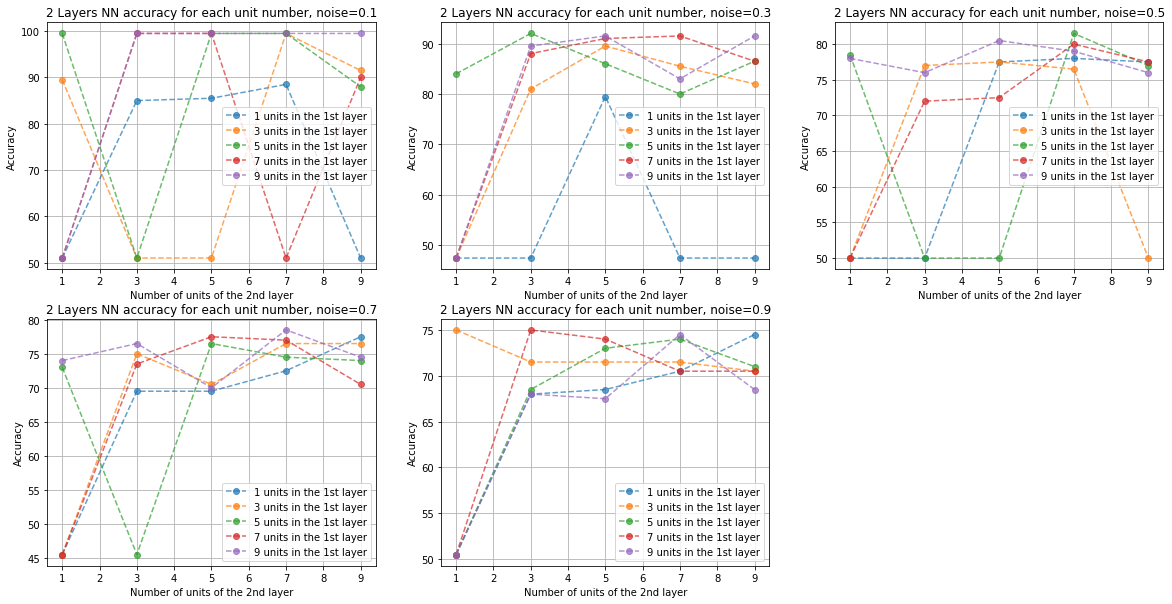

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def sigma(x):
    return 1/(1+np.exp(-x))

def sigma_prime(x):
    return sigma(x)*(1-sigma(x))

def relu(x):
    return np.maximum(0,x)

def relu_prime(x):
    x[x >= 0] = 1
    x[x < 0] = 0    
    return x

# Two hidden layers NN
def nn_2(noise,l1_hidden_units,l2_hidden_units):
    #Reading data
    data = []
    with open(f"two_moon_{noise}/train.txt") as f:
        data = f.readlines()

    val_data = []
    with open(f"two_moon_{noise}/val.txt") as f:
        val_data = f.readlines()  

    X_val = np.array(list(map((lambda str: [str.split()[0],str.split()[1]]), val_data)),dtype=float)
    y_val = np.array(list(map((lambda str: str.split()[2]), val_data)),dtype=int)
    #X_rows = np.array(list(map((lambda str: [str.split()[0],str.split()[1]]), data)),dtype=float)
    X = np.array([list(map((lambda str: str.split()[0]), data)),
                 list(map((lambda str: str.split()[1]), data))],dtype=float)
    y = np.array(list(map((lambda str: str.split()[2]), data)),dtype=int)
        
    #Training data
    m = len(X)
    b1 = np.zeros((l1_hidden_units,1))
    b2 = np.zeros((l2_hidden_units,1))
    b3 = 0
    w1 = np.random.randn(2,l1_hidden_units)*0.01
    w2 = np.random.randn(l1_hidden_units,l2_hidden_units)*0.01
    w3 = np.random.randn(l2_hidden_units,1)*0.01
    alpha = 0.01

    for epoch in range(1000):
        z1 = np.dot(w1.T,X) + b1
        y_hat1 = relu(z1)
        z2 = np.dot(w2.T,y_hat1) + b2
        y_hat2 = relu(z2)
        z3 = np.dot(w3.T,y_hat2) + b3
        y_hat3 = sigma(z3)
        
        dz3 = y_hat3 - y
        dw3 = (1/m)*np.dot(dz3,y_hat2.T)
        db3 = (1/m)*np.sum(dz3,axis=1,keepdims=True)
        
        dz2 = np.dot(w3,dz3)*relu_prime(z2)
        dw2 = (1/m)*np.dot(dz2,y_hat1.T)
        db2 = (1/m)*np.sum(dz2,axis=1,keepdims=True)
        
        dz1 = np.dot(w2,dz2)*relu_prime(z1)
        dw1 = (1/m)*np.dot(dz1,X.T)
        db1 = (1/m)*np.sum(dz1,axis=1,keepdims=True)
        w1 = w1-alpha*dw1.T
        w2 = w2-alpha*dw2.T
        w3 = w3-alpha*dw3.T
        b1 = b1-alpha*db1
        b2 = b2-alpha*db2
        b3 = b3-alpha*db3
    
    #Getting accuracy
    preds1 = relu(np.dot(X_val,w1) + b1.T)
    preds2 = relu(np.dot(preds1,w2) + b2.T)
    preds = sigma(np.dot(preds2,w3) + b3.T)
    preds_class = []
    preds_class = [1 if i > 0.5 else 0 for i in preds]
    preds_class = np.array(preds_class)

    accuracy = np.sum(y_val == preds_class) / m
    return accuracy
   
noises = [0.1,0.3,0.5,0.7,0.9]
l1_hidden_units_list = [1,3,5,7,9]
l2_hidden_units_list = [1,3,5,7,9]

noise_index = 1
accuracies = np.zeros((5,5))
plt.rcParams['figure.figsize'] = [20,10]
for noise in noises:
    unit_index_1 = 0
    plt.subplot(2,3,noise_index)
    plt.title(f"2 Layers NN accuracy for each unit number, noise={noise}")
    plt.xlabel("Number of units of the 2nd layer")
    plt.ylabel("Accuracy")
    for unit_nb1 in l1_hidden_units_list:
        unit_index_2 = 0
        label=f"{unit_nb1} units in the 1st layer"
        for unit_nb2 in l2_hidden_units_list:  
            accuracies[unit_index_1][unit_index_2] = nn_2(noise,unit_nb1,unit_nb2)
            unit_index_2 += 1
        plt.plot(l1_hidden_units_list,accuracies[unit_index_1],"o--", label=label,alpha=0.7)
        unit_index_1 += 1
    plt.grid()
    plt.legend()
    accuracies = np.zeros((5,5))
    noise_index += 1
    
plt.show()
# The accuracy decreases when the sound increases, but gets more stable
# For complex data, high number of units work a lot better. For less complex data, high number of units seems to work as well but it might be overfitting.

array([ 0, 62,  3,  0])